# Analýza hlavních komponent (Principal Component Analysis - PCA)

<div style="float: left; width:550px; margin-right: 20px">
Analýza hlavních komponent (Principal Component Analysis, PCA) je transformace vstupních dat sloužící k k jejich dekoleraci. <br><br>

Z následujícího vzorce je vidět, že PCA je jen přepsáním vstupu do jiné souřadné soustavy:<br><br>

${\displaystyle Y=XP}$<br><br>

kde $X$ je centrovaná matice $n \times d$ se vstupními $d$-rozměrnými daty v $n$ řádcích. $Y$ je obdobná matice výstupních dat, $P$ je $d \times d$ matice vlastních vektorů kovarianční matice ${\displaystyle C_{X}}$ splňující vztah ${\displaystyle C_{X}=P\Lambda P^{T}}$, kde ${\displaystyle \Lambda } $ je diagonální matice obsahující na diagonále vlastní čísla ${\displaystyle C_{X}}$ a ${\displaystyle P}$  je ortonormální matice vlastních vektorů ${\displaystyle C_{X}}$, tedy ${\displaystyle P^{T}P=I_{d}}$, kde ${\displaystyle I_{d}}$ je jednotková matice dimenze  ${\displaystyle d}$.<br><br>

Vlastní vektory (sloupce matice $P$) tvoří novou souřadnou soustavu vstupních dat. Centrování matice $X$ dosáhneme odečtením příslušného výběrového průměru od každého sloupce.<br><br>

Na obrázku 1 je zobrazen výsledek PCA na dvourozměrných vstupních datech. Delší vektor je hlavní komponenta, směr určuje vlastní vektor náležející většímu vlatnímu číslu. Tato komponenta vysvětluje nějvíce veriancí vstupních dat. Druhý, kratší, vektor, je určen vlastním vektorem s měnším vlatním číslem. Všechny vlastní vektory jsou na sebe samozřejmě kolmé. <br><br>

</div>
<div style="float: left; width: 402px">
<img src='https://blog.bioturing.com/wp-content/uploads/2018/11/Blog_pca_6b.png' width=400>
<center><i>Obr. 1 Výsledek PCA pro dvourozměrná data, delší vektro je nvýznamnější hlavní komponenta, druhy vektor je druhá nejvýznamnější komponenta. 2D data mají 2 hlavní komponenty.</i></center>
</div>
<div style="clear: both"></div>

Po normalizaci vlastních čísel, kdy jejích součet dává 1, tyto normalizovaná vlastní čísla určují kolik procent variancí je ve směru určeném náležejícím vlastním vaktorem vysvětleno. Pokud budou např. u trojrozměrných vstupních dat normalizovaná vlastní čísla $[0,7; 0,2; 0,1]$, pak nejvýznamnější komponenta vysvětluje 70% variancí, dvě nejvýznamnější komponenty 90% variancí.

Anlaýzu hlavních komponent lze využít pro:
- Snížení dimenizonality
- Filtraci dat zpětnou transoformací s nulováním vlastních vektorů náležejících nízkým vlastním číslům
- Kompresi obrazových dat
- ...
    

## Příklad filtrace obrázků

Nejprve načteme potřebné knihovny

- numpy: vědecká knihovna pro práci s daty
- matplotlib: knihovna pro vykreslování grafů
- sklearn: vědecká knihovna pro strojové učení
 * PCA: knihovna pro analýzu hlavních komponent
 * load_digits: dataset obsahující MNIST data - obrázky ručně psaných čísel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

Načteme dataset a zkontrolujeme jeho rozměr - 1797 obrázků s rozlišením 8x8 (vektor 64)

In [2]:
d = load_digits()
display(d.data.shape)

(1797, 64)

Nadefinujeme funkci, která vykreslí prvních 40 orázků v řádcích po deseti.

In [3]:
def plot_digits(data):
    plt.figure()
    for idx in range(40):
        plt.subplot(4, 10, idx+1)
        fig = plt.imshow(data[idx].reshape(8,8), cmap='gray')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

Vytvoříme si uměle zašuměná data pomocí generátoru psedonáhodných čísel s normálním rozdělením funkcí [`np.random.normal()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html?target='_blank') ,
kde první parametr je pole středních hodnot (vygeneruje se pole se stejným rozměrem jako pole data) a druhý parametr 
je standardní směrodatná odchylka). Z funkce je navráceno pole, kde jsou data náhodně pozměněna dle zadaných parametrů.

In [4]:
noisy = np.random.normal(d.data, 4)

Nyní si můžeme pomocí funkce `plot_digits` vykreslit prvních 40 vzorků původních a zašuměných dat.

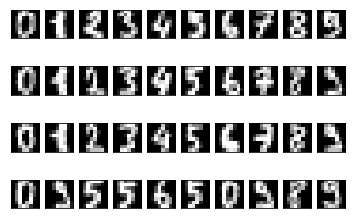

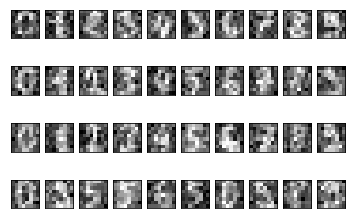

In [5]:
plot_digits(d.data)
plot_digits(noisy)

Vytvoříme objekt [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?target='_blank'), kerý poskytuje algoritmus pro analýzu hlavních komponent.
Argumentem při vytváření objektu je kolik procent variancí chceme uchovat (v tomot případě 50 %). Nad tímto objektem
zavoláme jeho metodu (funkci) [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit?target='_blank') do které pošleme vstupní data (zašuměná). Návratovou hodnotou je natrénovaná instance objektu pro analýzu hlavních komponent.

Instance objektu mimo jiné obsahuje atribut (proměnnou) `n_components_`, která obsahuje počet komponent potřebných pro splnění podmínky minimálně 50&nbsp;% vysvětlených variancí. V tomto případě potřebujeme zachovat 12 nejvýznamějších komponent.

In [6]:
pca = PCA(0.5).fit(noisy)
display(pca.n_components_)

12

V atributu `explained_variance_ratio_` je uloženo kolik každá z 12 nejvýznamnějších komponent vysvětluje variancí 
v datech (první 8,69 %, druhá 8,12 %, atd.).

In [7]:
display(pca.explained_variance_ratio_)

array([0.08812961, 0.08086216, 0.07142774, 0.0519516 , 0.03987031,
       0.03383251, 0.03093735, 0.02718758, 0.02593153, 0.02313106,
       0.01997252, 0.0192522 ])

Jejich součtem získáme celkový podíl variancí vysvětlených 12 nejvýznamnějšími komponentami (51,35 % > 50 %).

In [8]:
display(np.sum(pca.explained_variance_ratio_))

0.5124861620804143

Metodou [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform?target='_blank') transformujeme vstupní data do nového souřadného systému (se zachováním pouze 12 nejvýznamnějších komponent, ostatní se zahodí). Výsledkem je tedy pole 1797 obrázků v novém 12rozměrném souřadném systému (komprese, redukce dimenzionality).

In [9]:
components = pca.transform(noisy)
display(components.shape)

(1797, 12)

Z nového souřadného systému zachovávajících pouze 12 nejvýznamnějších komponent můžeme data zpětně transformovat do 
původního souřadného systému pomocí funkce [`inverse_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform?target='_blank') a získat tak původní obrázky bez hlavních komponent vysvětlujících nízká procenta variancí, tedy týkajících se pravděpodobně šumu (filtrace).

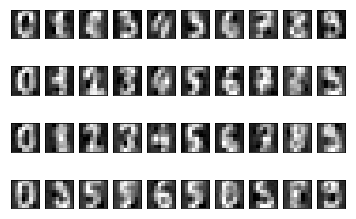

In [10]:
filtered = pca.inverse_transform(components)
plot_digits(filtered)